# Background - Currency exchange

* In order to facilitate the exchange of goods and services, between the countries, all the governments across the world, agreed set USD as an international currency. Making USD as an universally accepted and preferred currency for international trade.
* Generally, Banks and other Registered currency traders act as intermediaries in currency exchange market, providing the necessary liquidity in the market.
* Currencies are exchanged across the world on four exchanges, namely, Tokyo, Sydney, London, New York. The banks and other registered traders are members of these exchanges.
* Currency exchange transactions are facilitated, 24/7 through these exchanges. At any given point in time, one exchange will be operational, given the time zones. However, no trading happens on Saturday and Sunday and Public holidays.
* Currency exchange rates are determined by demand and supply in the market. However, there are multiple factors that affect the demand and supply of any given currency.
* Only factor that can directly impact the exchange rates are by political interventions. such as currency devaluation by the federal government of that country.
* Inter Currency exchange rates for all currencies other than USD are calculated using USD as a benchmark rate.

# EDA

## Basics
* Import libraries
* Import Data
* Check for Shapes, Dtypes, null values etc. using info()
    

### import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, pacf, acf
from statsmodels.tsa.seasonal import seasonal_decompose
import datetime as dt

### import data

In [2]:
rawData = pd.read_excel('DEXINUS.xls',
                        skiprows=10,
                        index_col=[0],
                        parse_dates=True)
rawData.head(2)

,DEXINUS
observation_date,
1973-01-02,8.02
1973-01-03,8.02


### Check for Shape, Null Values, Dtypes etc 

In [3]:
print(rawData.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12649 entries, 1973-01-02 to 2021-06-25
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DEXINUS  12155 non-null  float64
dtypes: float64(1)
memory usage: 197.6 KB
None


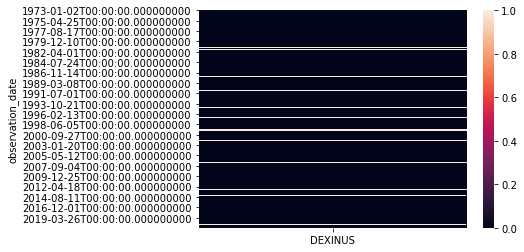

Count of null values in dataset is : 494


In [4]:
sns.heatmap(rawData.isnull())
plt.show()
print(
    f'Count of null values in dataset is : {len(rawData)-rawData.DEXINUS.count()}'
)

**Overall there are 494 null values in the dataset. and the DEXINUS column is marked as float64 correctly.**

Explanation for null values in the data

All these null values are mainly because of US holidays. The holidays are as follows:
* Dr. Martin Luther King Jr. Day (January 15 - 19)
* President’s Day (February 12 - 16)
* Good Friday (April 1 - 5)
* Memorial Day (May 28 - June 1)
* Independence Day (July 2 - 5)
* Labor Day (September 3 - 7)
* Thanksgiving (November 24 - 26)
* Christmas (December 23 - 27)
* New Year’s (December 30 - January 3)

`The idea is that, that missing values in the data are because of exchange holidays. The currency exchange markets are closed on Saturday and Sunday and on public holidays as declared by the Federal Bank of America.`

`Two ways to approach missing values problem:`
* There will no trading on public holidays, hence there will be no prevailing exchange rates for such holidays. Hence, Drop the missing values from the dataset.
* The previous closing will prevail till the next trading day. Hence, impute the previous closing using 'ffill' technique

**However, since the holidays change every year we simply can not drop values. This will lead to the problem of discontinuation of data. it was easy to delete the `NAN` values if they all fell on same day of each year. Dropping of `NAN` values will affect our predictions also. HENCE, WE CHOOSE NOT TO DROP THE NULL VALUES. INSTEAD WE IMPUTE THEM WITH PREVIOUS CLOSING.**

## Data Preparation

* **Fabricate new columns for 'Year', 'Month', 'YrMonth' for analysis**
        We shall extract 'Year', 'Month', 'YrMonth' for grouping and analysis.
* **Create a copy of the data with imputed null values**

### Frabrication of new columns

In [5]:
rawData['Year'] = rawData.index.year
rawData['Month'] = rawData.index.month
rawData['YrMonth'] = rawData.index.to_period('M')
rawData

,DEXINUS,Year,Month,YrMonth
observation_date,,,,
1973-01-02,8.02,1973,1,1973-01
1973-01-03,8.02,1973,1,1973-01
1973-01-04,8.00,1973,1,1973-01
1973-01-05,8.01,1973,1,1973-01
1973-01-08,8.00,1973,1,1973-01
...,...,...,...,...
2021-06-21,74.18,2021,6,2021-06
2021-06-22,74.37,2021,6,2021-06
2021-06-23,74.13,2021,6,2021-06


### Creating a copy of data by imputing missing values using 'ffill technique'

In [6]:
data_impu_na = rawData.copy(deep=True)
data_impu_na['DEXINUS'].fillna(method='ffill', inplace=True)
data_impu_na.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12649 entries, 1973-01-02 to 2021-06-25
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype    
---  ------   --------------  -----    
 0   DEXINUS  12649 non-null  float64  
 1   Year     12649 non-null  int64    
 2   Month    12649 non-null  int64    
 3   YrMonth  12649 non-null  period[M]
dtypes: float64(1), int64(2), period[M](1)
memory usage: 494.1 KB


In [7]:
data_impu_na.head(3)

,DEXINUS,Year,Month,YrMonth
observation_date,,,,
1973-01-02,8.02,1973,1,1973-01
1973-01-03,8.02,1973,1,1973-01
1973-01-04,8.00,1973,1,1973-01


# Data Visualization
* Line plot - plotted for every 10 year interval with shared y axis
* Box plot - plotted for every 5 year interval and for every year
* Line plot - plotted annually to check the annual variation and seasonality

## Line plot for 10 year interval

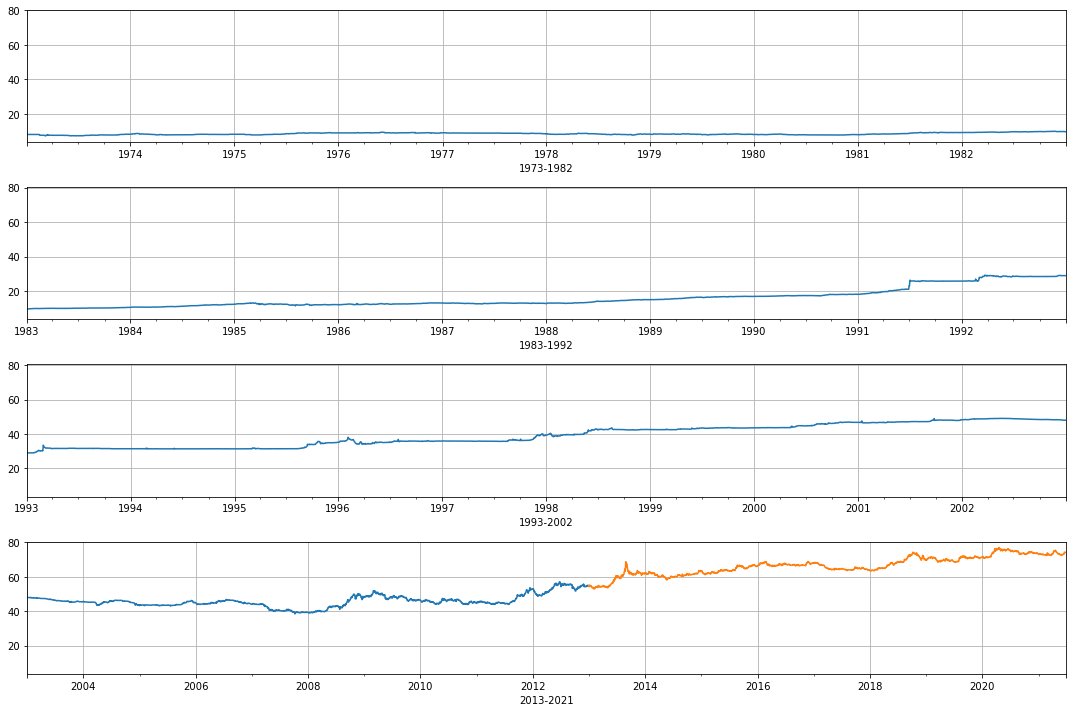

In [8]:
fig, ax = plt.subplots(4, 1, figsize=(15, 10), sharey=True)
data_impu_na.loc['1973':'1982']['DEXINUS'].plot(xlabel="1973-1982",
                                                stacked=True,
                                                ax=ax[0],
                                                grid=True)
data_impu_na.loc['1983':'1992']['DEXINUS'].plot(xlabel="1983-1992",
                                                stacked=True,
                                                ax=ax[1],
                                                grid=True)
data_impu_na.loc['1993':'2002']['DEXINUS'].plot(xlabel="1993-2002",
                                                ax=ax[2],
                                                grid=True)
data_impu_na.loc['2003':'2012']['DEXINUS'].plot(xlabel="2003-2012",
                                                ax=ax[3],
                                                grid=True)
data_impu_na.loc['2013':'2022']['DEXINUS'].plot(xlabel="2013-2021",
                                                ax=ax[3],
                                                grid=True)
plt.tight_layout()
plt.show()

**WE HAVE TOTAL 47.5 YEARS OF DATA FOR ANALYSIS.** HENCE, CHOSE TO STUDY - INTERVAL OF 10 YEARS TO START WITH
* **For the first 10 years the trend is almost flat and zero variations.**
* **For next 10 years the trend is slightly incremental and no variations for majority of the years. we can only see the increase in the last two years of the decade.**
* **For Third decade the trend is incremental and there are minor variations.**
* **For last decade we can see the trend is incremental and there are strong fluctuation in the data.**

**Line plot for 10 year interval without a shared 'y' axis**

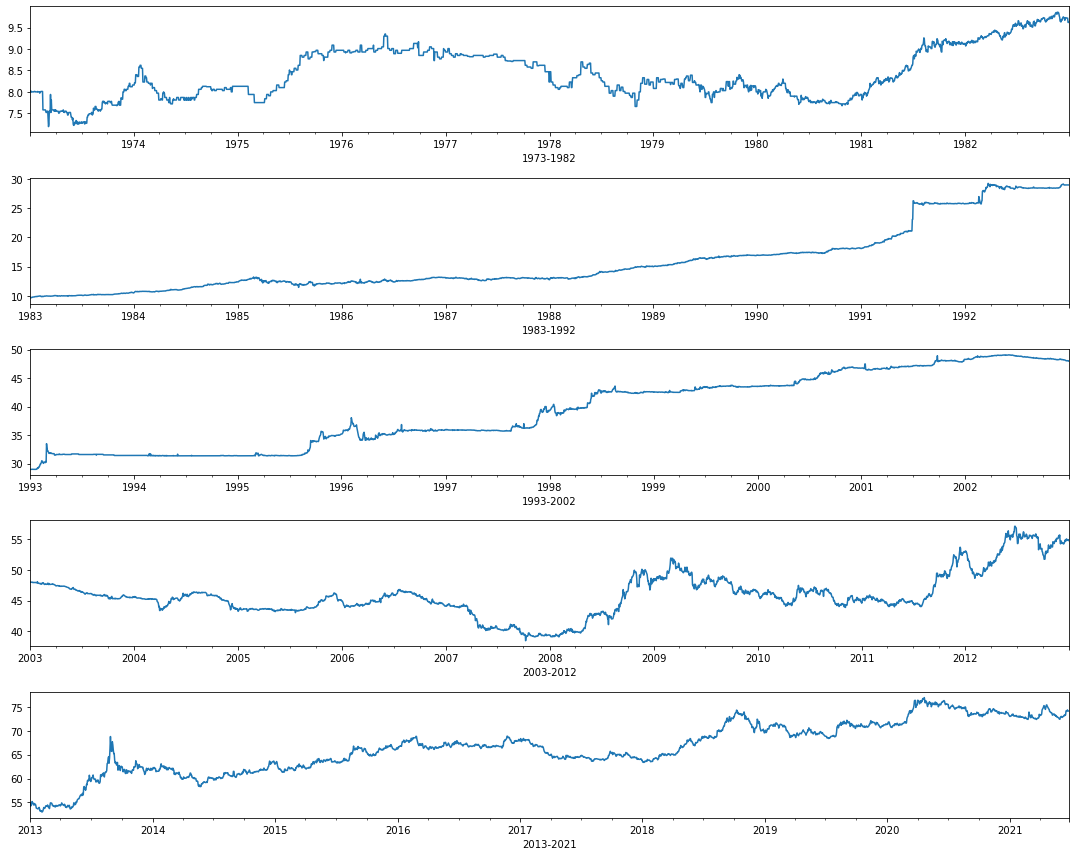

In [9]:
fig, ax = plt.subplots(5, 1, figsize=(15, 12))
data_impu_na.loc['1973':'1982']['DEXINUS'].plot(xlabel="1973-1982",
                                                stacked=True,
                                                ax=ax[0])
data_impu_na.loc['1983':'1992']['DEXINUS'].plot(xlabel="1983-1992",
                                                stacked=True,
                                                ax=ax[1])
data_impu_na.loc['1993':'2002']['DEXINUS'].plot(xlabel="1993-2002", ax=ax[2])
data_impu_na.loc['2003':'2012']['DEXINUS'].plot(xlabel="2003-2012", ax=ax[3])
data_impu_na.loc['2013':'2022']['DEXINUS'].plot(xlabel="2013-2021", ax=ax[4])
plt.tight_layout()
plt.show()

As we can note from the above chart that the currency movement are range bound as first decade showing only movement of ~₹2/- while the rest of the decade show minimum movement of ₹20/- and max of ₹30/-. One more major thing to note is that the Volatility in the market has increased since 2008 and it sis still prevailing.

## Box plot for 5 year intervals

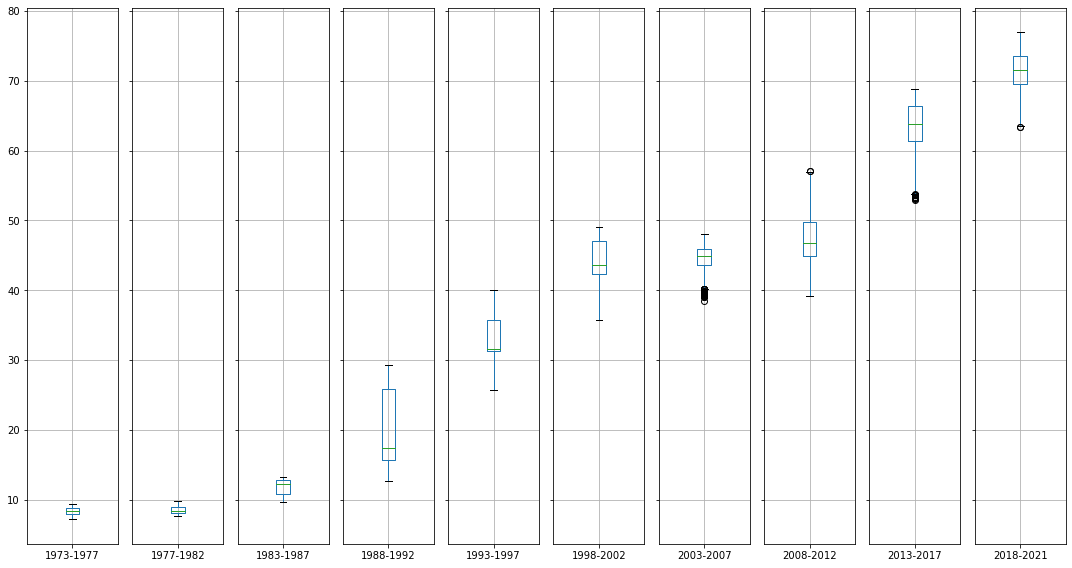

In [10]:
fig, ax = plt.subplots(1, 10, figsize=(15, 8), sharey=True)
data_impu_na.loc['1973':'1977']['DEXINUS'].plot(kind='box',
                                                label="1973-1977",
                                                stacked=True,
                                                ax=ax[0],
                                                grid=True)
data_impu_na.loc['1977':'1982']['DEXINUS'].plot(kind='box',
                                                label="1977-1982",
                                                stacked=True,
                                                ax=ax[1],
                                                grid=True)
data_impu_na.loc['1983':'1987']['DEXINUS'].plot(kind='box',
                                                label="1983-1987",
                                                stacked=True,
                                                ax=ax[2],
                                                grid=True)
data_impu_na.loc['1988':'1992']['DEXINUS'].plot(kind='box',
                                                label="1988-1992",
                                                stacked=True,
                                                ax=ax[3],
                                                grid=True)
data_impu_na.loc['1992':'1997']['DEXINUS'].plot(kind='box',
                                                label="1993-1997",
                                                ax=ax[4],
                                                grid=True)
data_impu_na.loc['1997':'2002']['DEXINUS'].plot(kind='box',
                                                label="1998-2002",
                                                ax=ax[5],
                                                grid=True)
data_impu_na.loc['2003':'2007']['DEXINUS'].plot(kind='box',
                                                label="2003-2007",
                                                ax=ax[6],
                                                grid=True)
data_impu_na.loc['2008':'2012']['DEXINUS'].plot(kind='box',
                                                label="2008-2012",
                                                ax=ax[7],
                                                grid=True)
data_impu_na.loc['2013':'2017']['DEXINUS'].plot(kind='box',
                                                label="2013-2017",
                                                ax=ax[8],
                                                grid=True)
data_impu_na.loc['2018':'2021']['DEXINUS'].plot(kind='box',
                                                label="2018-2021",
                                                ax=ax[9],
                                                grid=True)
plt.tight_layout()
plt.show()

If we closely observe the median values we note that there are two flat trends one from 1973 to 1982 and from 1998 to 2012, also there are two positive trends from 1983 to 2002 and from 2008 to 2021.

Further, the range of variate is very low in the beginning and range is on the higher side from 1988 onwards.

## Annual Box Plot

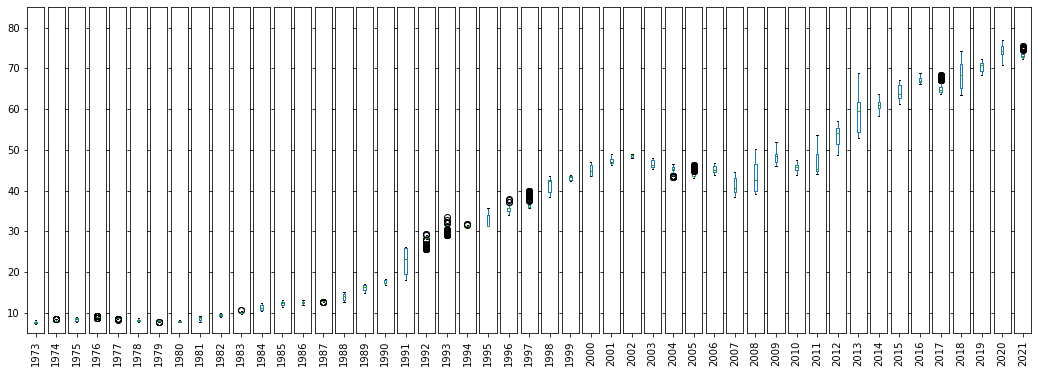

In [11]:
# G.DEXINUS.plot(subplots=True,kind='box')
# data_impu_na.groupby('Year').plot(y = 'DEXINUS',kind='box',subplots=True)
G = data_impu_na.groupby('Year')

A = list(np.unique(data_impu_na.Year))

fig, ax = plt.subplots(1, len(A), figsize=(18, 6), sharey=True)
for i, year in enumerate(A):
    X = G.get_group(year)
    # subplots=True,layout=(1,len(A)),figsize=(18,8),use_index = True,
    X.plot(y='DEXINUS',
           kind='box',
           ax=ax[i],
           label=year,
           rot=90,
           ylim=(5, 85),
           sharey=True)
    plt.tight_layout
plt.show()

The annual plot mimics the 5 year plot but what we can note is that there are two event which had their impact on the currency market.

1. 1991 liberalization of economy and devaluation of rupee.
2. The WTC attack dated 11-9-2001 popularly known as attacks of 9/11

This plot clearly know that volatility in the market has picked up from 2008 onwards.

## Annual line plot

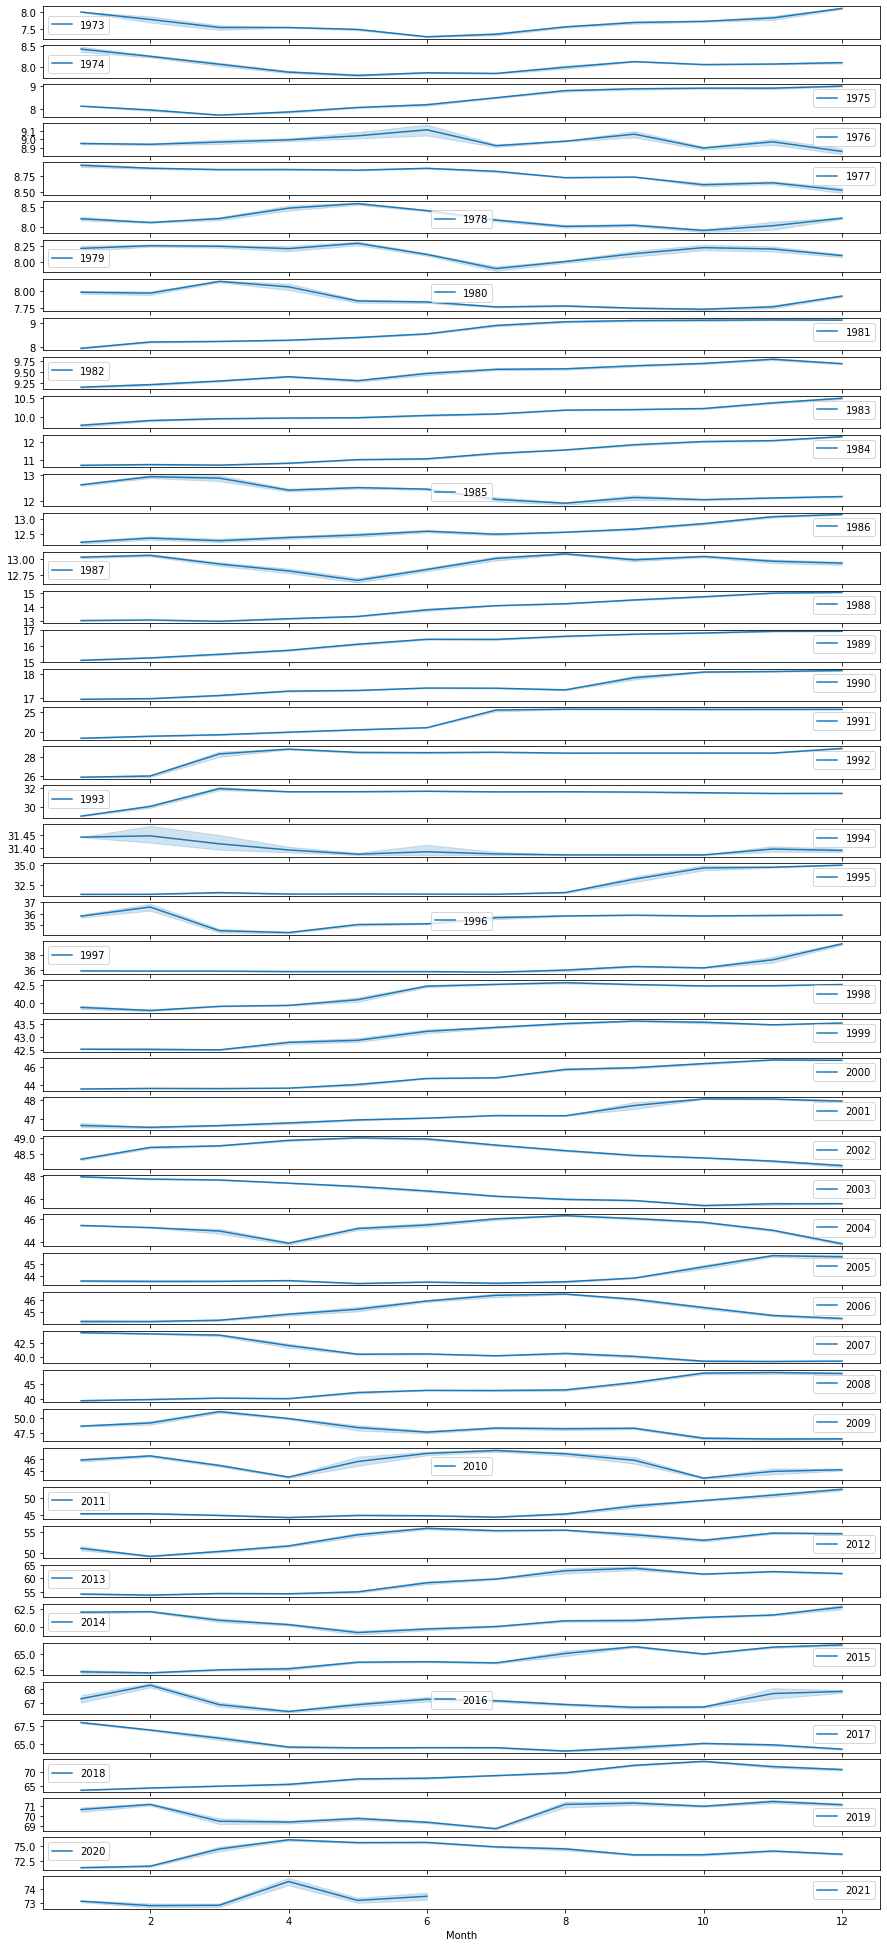

In [12]:
fig, ax = plt.subplots(len(A), 1, sharex=True,
                       figsize=(15, 35))  # ,sharey=True

for i, year in enumerate(A):
    X = G.get_group(year)
    #     X.plot(y='DEXINUS', x='Month',sharex = True, sharey = True,
    #            ax = ax[i], xlabel = 'months', label = year,figsize = (10,2)) #subplots = True,  ylabel = 'Exchange rate',
    sns.lineplot(
        y=X.iloc[:, 0],
        x=X.Month,
        ax=ax[i],
        label=year,
    )
    ax[i].set_ylabel("")
    plt.tight_layout
# fig.set_ylabel('DNXINUS')
# plt.ylabel('DNEXUS')
plt.show()

This plot was mainly plotted to study the seasonality in the data. However, there is no evidence for seasonality in the data.  

### ACF and PACF plots

In [13]:
print(acf(rawData.DEXINUS, nlags=20, fft=False),
      end='\n\n')  # Calculating ACF on rawData
# print( acf(data_drop_na.DEXINUS,nlags=20, fft = False), end = '\n\n')     # Calculating ACF on Data_drop_NA
print(acf(data_impu_na.DEXINUS, nlags=20, fft=False),
      end='\n\n')  # Calculating ACF on Data_impu_NA

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan]

[1.         0.99976293 0.99952811 0.99929655 0.99906418 0.9988307
 0.99859366 0.99835785 0.99812891 0.99789877 0.99766864 0.99743762
 0.99720686 0.99697664 0.9967463  0.99651666 0.99628548 0.99605324
 0.99582165 0.99559202 0.99536435]



**Observations**

* As rawData contains null values the calculation of lags will yield null values hence acf is not being calculated for rawData.

* ACF values for the data_impu_na both show very high correlation.

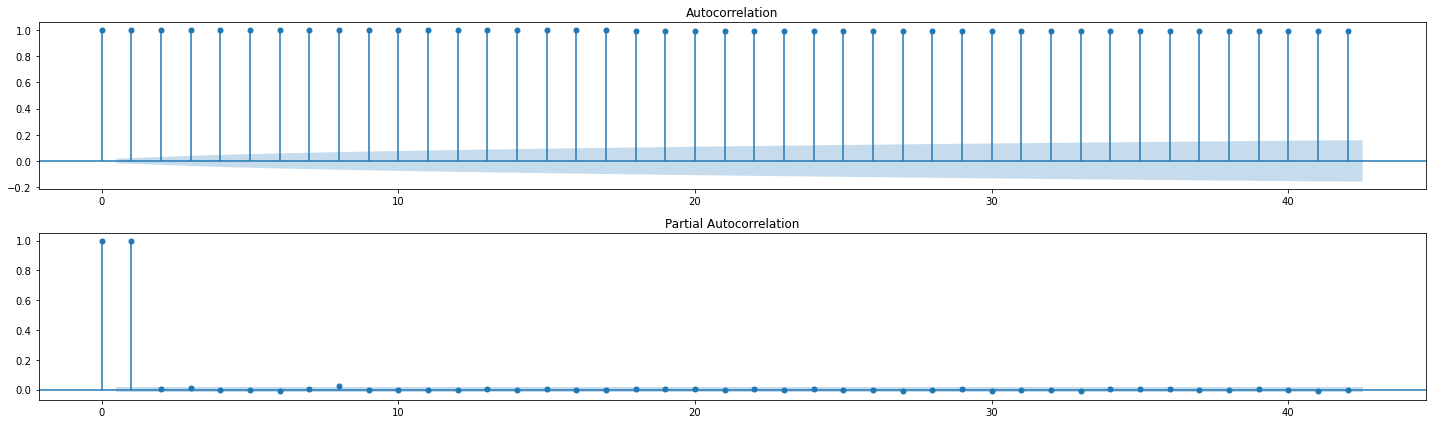

In [14]:
fig, ax = plt.subplots(2, 1, figsize=(20, 6))
plot_acf(data_impu_na.DEXINUS, ax=ax[0])
plot_pacf(data_impu_na.DEXINUS, ax=ax[1])
plt.tight_layout()
plt.show()

* Autocorrelation plot :- Almost every lag shows same level of correlation with our y variable
* Partial Autocorrelation :- only one lag i.e. lag-1 is sufficient to predict y.

## Decomposition plot

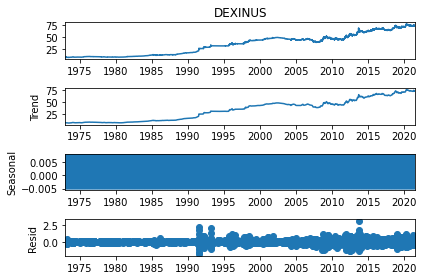

In [15]:
seasonal_decompose(data_impu_na.DEXINUS, period=12).plot()
plt.show()

* As discussed above decomposition plot confirms trend in the data.
* It is evident that there is no seasonality in the data.
* lastly, the resid plot shows the volatility in the data is on the rise.  

# Conclusion
While we can see the trend in the data but there is no evidence of seasonality in the data.

Though the trend is evident the trend is not constant.

There is Volatility in the data and the volatility has increased over the period of time. but we can not see any pattern in the increment of volatility.